In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('shopping_data.csv',low_memory=False)

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


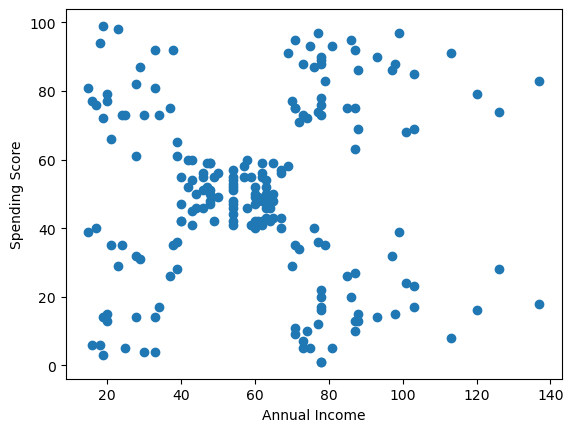

In [8]:
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data = df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

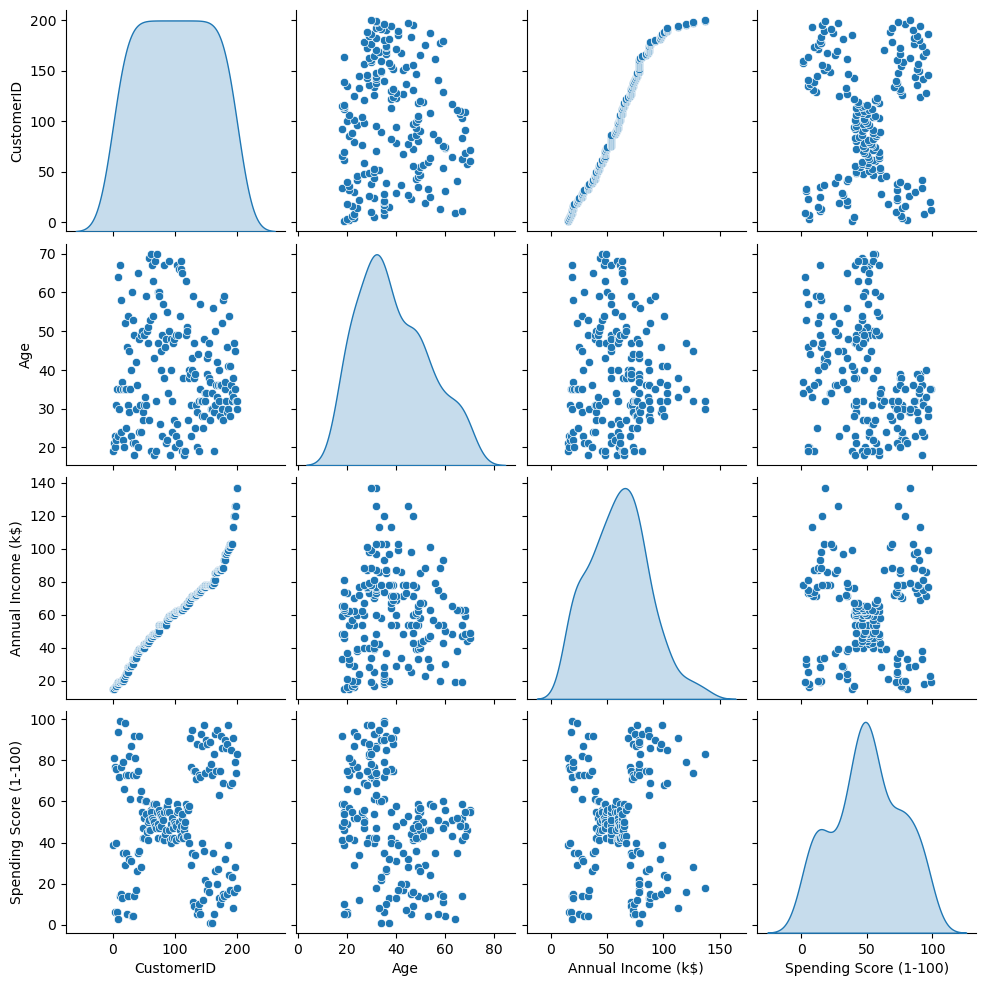

In [9]:
sns.pairplot(df, diag_kind='kde')

In [10]:
# We are going to find relation/clusters for Income vs Score
X = df.iloc[:,3:5].values

In [11]:
#split the data into train and test datasets
X_train,X_test = train_test_split(X,test_size=0.33,random_state=42)

In [12]:
print(X_train.shape, X_test.shape)

(134, 2) (66, 2)


In [13]:
#Apply standardization as the metrics are different for both columns
standardscaler = StandardScaler()
X_train_scaled = standardscaler.fit_transform(X_train)
X_test_scaled = standardscaler.transform(X_test)

## K Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
#wcss method to calculate the no.of centroids 
#k-means++ - initialize centroids that are far away from each other to avoid random initialization trap
wcss = [] 
for k in range(1,12): 
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [18]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.57922077922,
 26686.83778518779,
 24766.471609793436,
 23103.12208598392,
 18912.012480785143]

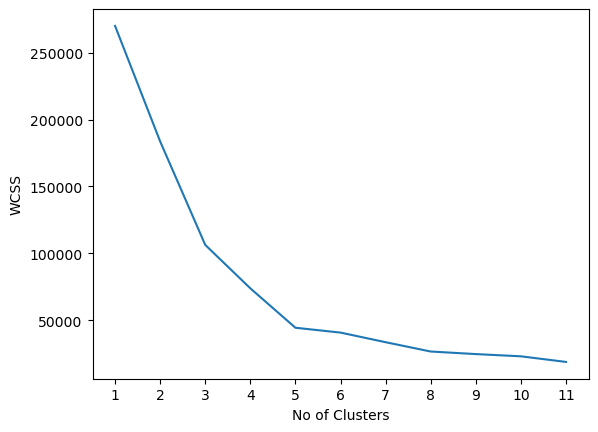

In [19]:
# elbow method shows that 5 clusters can be considered
plt.plot(range(1,12),wcss)
plt.xticks(range(1,12))
plt.ylabel('WCSS')
plt.xlabel('No of Clusters')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++')
x_train_pred = kmeans.fit(X_train_scaled)

In [21]:
x_test_pred = kmeans.predict(X_test_scaled)

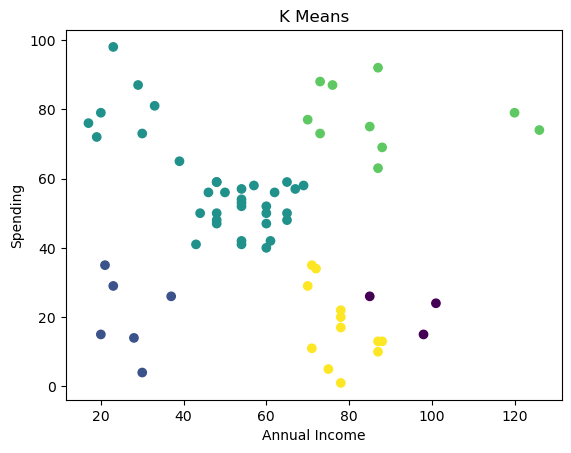

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=x_test_pred)
plt.title('K Means')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()

## Hierarchial

In [24]:
import scipy.cluster.hierarchy as sc

In [25]:
#instead of splitting into train and test applying standard scaler on whole dataset
standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(X)

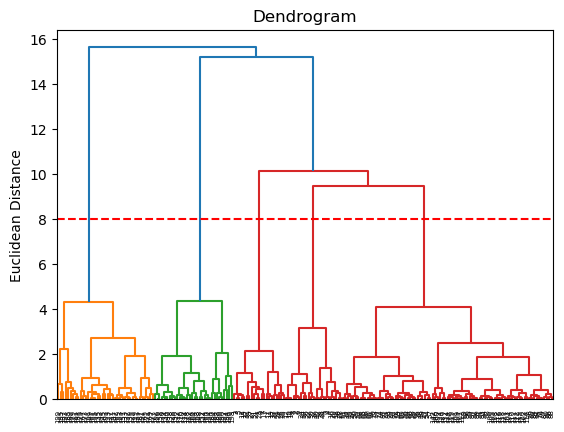

In [26]:
dendrogram = sc.dendrogram(sc.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.axhline(8, c='r', linestyle='--')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
agglomerativeclustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
x_predict = agglomerativeclustering.fit_predict(X_scaled)

In [29]:
x_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

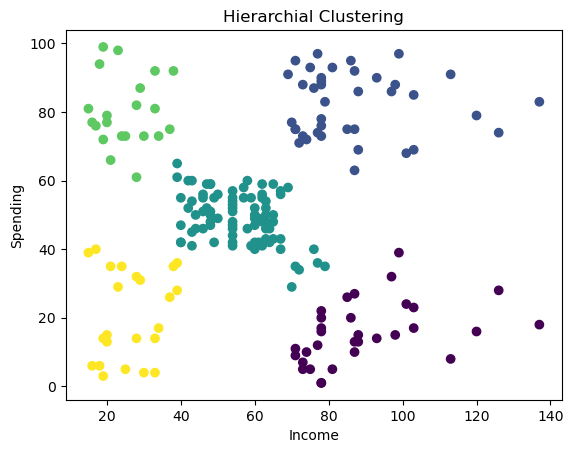

In [30]:
# Visualization
plt.scatter(X[:,0],X[:,1],c=x_predict)
plt.title('Hierarchial Clustering')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=0.4)

In [34]:
predict = dbscan.fit_predict(X_scaled)

In [35]:
predict

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

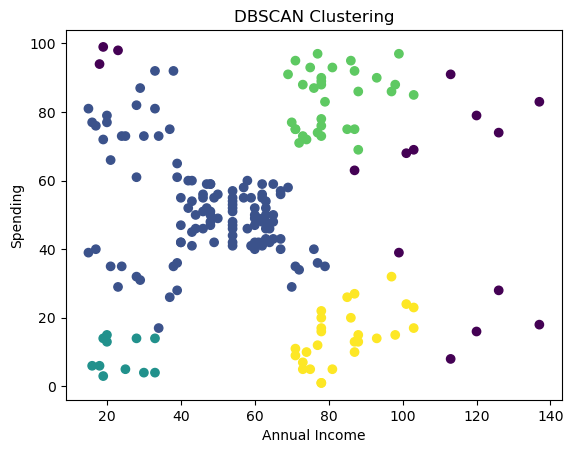

In [36]:
plt.scatter(X[:,0],X[:,1], c=predict)
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.title('DBSCAN Clustering')
plt.show()

## Validating Clusters

In [38]:
## To validate the k value - we have to calculate silhoutte score
!pip install kneed

In [39]:
from kneed import KneeLocator

kl = KneeLocator(range(1,12), wcss, curve='convex', direction='decreasing')
kl.elbow

5

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhoutte_coefficients = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=5, init='k-means++')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhoutte_coefficients.append(score)

In [42]:
silhoutte_coefficients

[0.5546571631111091,
 0.5546571631111091,
 0.46101956285832757,
 0.5539423799434205,
 0.5546571631111091,
 0.5546571631111091,
 0.5539423799434205,
 0.5546571631111091,
 0.5539423799434205,
 0.46378684677817206,
 0.5539423799434205]

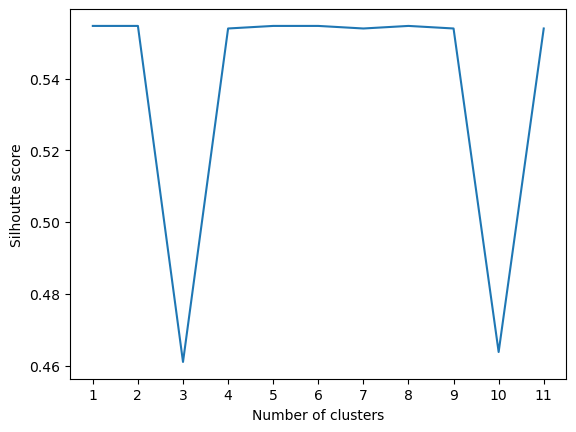

In [43]:
plt.plot(range(1,12), silhoutte_coefficients)
plt.xticks(range(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

##consider the cluster value where the silhoutte score is high and then starts decreasing